# Homework IV - Aprendizagem

**Afonso da Conceição Ribeiro**, 102763
<br>
**Miguel Gomes Marques Pessanha de Almeida**, 103493

## I. Pen and Paper [11v]

**Given the following observations,**
$
\left\{
\begin{bmatrix} 1 \\  0.6 \\  0.1 \end{bmatrix},
\begin{bmatrix} 0 \\ -0.4 \\  0.8 \end{bmatrix},
\begin{bmatrix} 0 \\  0.2 \\  0.5 \end{bmatrix},
\begin{bmatrix} 1 \\  0.4 \\ -0.1 \end{bmatrix}
\right\}
$
**. <br> Consider a Bayesian clustering that assumes {y<sub>1</sub>} ⫫ {y<sub>2</sub>, y<sub>3</sub>}, two clusters following a Bernoulli distribution on y<sub>1</sub> (p<sub>1</sub> and p<sub>2</sub>), a multivariate Gaussian on {y<sub>2</sub>, y<sub>3</sub>} (N<sub>1</sub> and N<sub>2</sub>), and the following initial mixture:**
$$
π_1 = 0.5 \;, \quad π_2 = 0.5
$$
$$
p_1 = P(y_1 = 1) = 0.3 \;, \quad p_2 = P(y_1 = 1) = 0.7
$$
$$
N_1 \left(
	\textbf{μ}_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \;
	\textbf{Σ}_1 = \begin{bmatrix} 2 & 0.5 \\ 0.5 & 2 \end{bmatrix}
\right), \quad
N_2 \left(
	\textbf{μ}_2 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \;
	\textbf{Σ}_2 = \begin{bmatrix} 1.5 & 1 \\ 1 & 1.5 \end{bmatrix}
\right).
$$

In [116]:
import numpy as np
np.set_printoptions(precision=8, suppress=True)

### 1) [6v]

**Perform one epoch of the EM clustering algorithm and determine the new parameters. <br>
Hint: we suggest you to use `numpy` and `scipy`, however disclose the intermediary results step by step.**

In [117]:
x1 = np.array([1, 0.6, 0.1])
x2 = np.array([0, -0.4, 0.8])
x3 = np.array([0, 0.2, 0.5])
x4 = np.array([1, 0.4, -0.1])
π1 = 0.5
π2 = 0.5
p1 = np.array([1-0.3, 0.3])
p2 = np.array([1-0.7, 0.7])
μ1 = np.array([1, 1])
Σ1 = np.array([[2, 0.5], [0.5, 2]])
μ2 = np.array([0, 0])
Σ2 = np.array([[1.5, 1], [1, 1.5]])

def gaussian(x, μ, Σ):
    return (1 / np.sqrt(np.linalg.det(2 * np.pi * Σ))) * np.exp(-0.5 * np.dot(np.dot((x - μ).T, np.linalg.inv(Σ)), (x - μ)))

X = np.array([x1, x2, x3, x4])
π = np.array([π1, π2])
p = np.array([p1, p2])
μ = np.array([μ1, μ2])
Σ = np.array([Σ1, Σ2])


# E-Step

print("Gaussians:")
gaussians = np.zeros((2, 4))
for k in range(1, 3):
    for i in range(1, 5):
        gaussians[k-1][i-1] = gaussian(X[i-1][1:], μ[k-1], Σ[k-1])
        formatted_pdf = "{:.8f}".format(gaussians[k-1][i-1])
        print("N(x{} | μ{}, Σ{}) = {}".format(i, k, k, formatted_pdf))

# print("\nLikelihoods:")
likelihoods = np.zeros((2, 4))
for k in range(1, 3):
    for i in range(1, 5):
        likelihoods[k-1][i-1] = p[k-1][int(X[i-1, 0])] * gaussians[k-1][i-1]
        # print("P(x{} | c{}) = {:.8f}".format(i, k, likelihoods[k-1][i-1]))

print("\nPosteriors:")
posteriors = np.zeros((2, 4))
for k in range(1, 3):
    for i in range(1, 5):
        posteriors[k-1, i-1] = (likelihoods[k-1][i-1] * π[k-1]) / (likelihoods[0][i-1] * π1 + likelihoods[1][i-1] * π2)
        print("P(c{} | x{}) = {:.8f}".format(k, i, posteriors[k-1, i-1]))


# M-Step

# N_k
N1 = np.sum(posteriors[0])
N2 = np.sum(posteriors[1])
# print("N1 = {:.8f}".format(N1))
# print("N2 = {:.8f}".format(N2))

# π_k
π1_new = N1 / (N1 + N2)
π2_new = N2 / (N1 + N2)
print("\nπ1 = {:.8f}".format(π1_new))
print("π2 = {:.8f}".format(π2_new))

# p_k
p1_new = np.sum(posteriors[0] * X[:, 0]) / N1
p1_new = np.array([1-p1_new, p1_new])
p2_new = np.sum(posteriors[1] * X[:, 0]) / N2
p2_new = np.array([1-p2_new, p2_new])
print("\np1 = {:.8f}".format(p1_new[1]))
print("p2 = {:.8f}".format(p2_new[1]))

# μ_k
μ1_new = np.zeros(2)
μ2_new = np.zeros(2)
for i in range(1, 5):
    μ1_new += posteriors[0, i-1] * X[i-1][1:]
    μ2_new += posteriors[1, i-1] * X[i-1][1:]
μ1_new /= N1
μ2_new /= N2
print("\nμ1 = {}".format(μ1_new))
print("μ2 = {}".format(μ2_new))

# Σ_k
Σ1_new = np.zeros((2, 2))
Σ2_new = np.zeros((2, 2))
for i in range(1, 5):
    Σ1_new += posteriors[0, i-1] * np.outer(X[i-1][1:] - μ1_new, X[i-1][1:] - μ1_new)
    Σ2_new += posteriors[1, i-1] * np.outer(X[i-1][1:] - μ2_new, X[i-1][1:] - μ2_new)
Σ1_new /= N1
Σ2_new /= N2
print("\nΣ1 = {}".format(Σ1_new))
print("Σ2 = {}".format(Σ2_new))

Gaussians:
N(x1 | μ1, Σ1) = 0.06657530
N(x2 | μ1, Σ1) = 0.05004889
N(x3 | μ1, Σ1) = 0.06837452
N(x4 | μ1, Σ1) = 0.05904699
N(x1 | μ2, Σ2) = 0.11961837
N(x2 | μ2, Σ2) = 0.06819058
N(x3 | μ2, Σ2) = 0.12958103
N(x4 | μ2, Σ2) = 0.12450009

Posteriors:
P(c1 | x1) = 0.19258959
P(c1 | x2) = 0.63134512
P(c1 | x3) = 0.55181128
P(c1 | x4) = 0.16892423
P(c2 | x1) = 0.80741041
P(c2 | x2) = 0.36865488
P(c2 | x3) = 0.44818872
P(c2 | x4) = 0.83107577

π1 = 0.38616755
π2 = 0.61383245

p1 = 0.23403948
p2 = 0.66731817

μ1 = [0.026509   0.50712978]
μ2 = [0.30914476 0.2104205 ]

Σ1 = [[ 0.14136501 -0.10540546]
 [-0.10540546  0.0960526 ]]
Σ2 = [[ 0.10829305 -0.08865175]
 [-0.08865175  0.1041233 ]]


##### E-Step

$$ \text{Prior:} \; P(c_k) = π_k $$

$$
\text{Likelihood:} \;
    P(\textbf{x}_i \; | \; c_k) = p_k(x_{i1}) \cdot
        N \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} \; | \; \textbf{μ}_k, \textbf{Σ}_k \right),
\qquad
p_k(x_{i1}) = \begin{cases}
    p_k, & x_{i1} = 1 \\
    1 - p_k, & x_{i1} = 0 \\
\end{cases}
$$

$$
\text{Normalized posterior:} \;
    γ_{k,i} = P(c_k \; | \; \textbf{x}_i) = \frac{P(\textbf{x}_i \; | \; c_k) \cdot P(c_k)}
        {\displaystyle\sum_{j = 1}^n \; P(\textbf{x}_i \; | \; c_j) \cdot P(c_j)}
        =
        \frac{p_k(x_{i1}) \cdot
        N \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} \; | \; \textbf{μ}_k, \textbf{Σ}_k \right) \cdot π_k}
        {\displaystyle\sum_{j = 1}^n \; p_j(x_{i1}) \cdot
        N \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} \; | \; \textbf{μ}_j, \textbf{Σ}_j \right) \cdot π_j}
$$

$$ γ_{1,1} = P(c_1 \; | \; \textbf{x}_1) = \frac{0.3 \cdot 0.06657530 \cdot 0.5}{0.3 \cdot 0.06657530 \cdot 0.5 + 0.7 \cdot 0.11961837 \cdot 0.5} = 0.19258959 $$
$$ γ_{1,2} = P(c_1 \; | \; \textbf{x}_2) = \frac{(1 - 0.3) \cdot 0.05004889 \cdot 0.5}{(1 - 0.3) \cdot 0.05004889 \cdot 0.5 + (1 - 0.7) \cdot 0.06819058 \cdot 0.5} = 0.63134512 $$
$$ γ_{1,3} = P(c_1 \; | \; \textbf{x}_3) = \frac{(1 - 0.3) \cdot 0.06837452 \cdot 0.5}{(1 - 0.3) \cdot 0.06837452 \cdot 0.5 + (1 - 0.7) \cdot 0.12958103 \cdot 0.5} = 0.55181128 $$
$$ γ_{1,4} = P(c_1 \; | \; \textbf{x}_4) = \frac{0.3 \cdot 0.05904699 \cdot 0.5}{0.3 \cdot 0.05904699 \cdot 0.5 + 0.7 \cdot 0.12450009 \cdot 0.5} = 0.16892423 $$
$$ γ_{2,1} = P(c_2 \; | \; \textbf{x}_1) = \frac{0.7 \cdot 0.11961837 \cdot 0.5}{0.3 \cdot 0.06657530 \cdot 0.5 + 0.7 \cdot 0.11961837 \cdot 0.5} = 0.80741041 $$
$$ γ_{2,2} = P(c_2 \; | \; \textbf{x}_2) = \frac{(1 - 0.7) \cdot 0.06819058 \cdot 0.5}{(1 - 0.3) \cdot 0.05004889 \cdot 0.5 + (1 - 0.7) \cdot 0.06819058 \cdot 0.5} = 0.36865488 $$
$$ γ_{2,3} = P(c_2 \; | \; \textbf{x}_3) = \frac{(1 - 0.7) \cdot 0.12958103 \cdot 0.5}{(1 - 0.3) \cdot 0.06837452 \cdot 0.5 + (1 - 0.7) \cdot 0.12958103 \cdot 0.5} = 0.44818872 $$
$$ γ_{2,4} = P(c_2 \; | \; \textbf{x}_4) = \frac{0.7 \cdot 0.12450009 \cdot 0.5}{0.3 \cdot 0.05904699 \cdot 0.5 + 0.7 \cdot 0.12450009 \cdot 0.5} = 0.83107577 $$

##### M-Step

$$ N_k = \sum_{i = 1}^n γ_{k,i} $$

$$ π_k = \frac{N_k}{\displaystyle\sum_{j = 1}^2 N_j} $$

$$ p_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot x_{i1} $$

$$ \textbf{μ}_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} $$

$$ \textbf{Σ}_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} - \textbf{μ}_k \right) \cdot \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} - \textbf{μ}_k \right)^T

##### M-Step

$$ N_k = \sum_{i = 1}^n γ_{k,i} $$

$$ π_k = \frac{N_k}{\displaystyle\sum_{j = 1}^2 N_j} $$

$$ p_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot x_{i1} $$

$$ \textbf{μ}_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} $$

$$ \textbf{Σ}_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} - \textbf{μ}_k \right) \cdot \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} - \textbf{μ}_k \right)^T

##### M-Step

$$ N_k = \sum_{i = 1}^n γ_{k,i} $$

$$ π_k = \frac{N_k}{\displaystyle\sum_{j = 1}^2 N_j} $$

$$ p_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot x_{i1} $$

$$ \textbf{μ}_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} $$

$$ \textbf{Σ}_k = \frac{1}{N_k} \; \sum_{i = 1}^n γ_{k,i} \cdot \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} - \textbf{μ}_k \right) \cdot \left( \begin{bmatrix} x_{i2} \\ x_{i3} \end{bmatrix} - \textbf{μ}_k \right)^T

$$ N_1 = 0.19258959 + 0.63134512 + 0.55181128 + 0.16892423 = 1.54467022 $$
$$ N_2 = 0.80741041 + 0.36865488 + 0.44818872 + 0.83107577 = 2.45532978 $$

$$ π_1 = \frac{1.54467022}{1.54467022 + 2.45532978} = 0.38616755 $$
$$ π_2 = \frac{2.45532978}{1.54467022 + 2.45532978} = 0.61383245 $$

$$ p_1 = \frac{1}{1.54467022} \cdot
    (0.19258959 \cdot 1 + 0.63134512 \cdot 0 + 0.55181128 \cdot 0 + 0. 16892423 \cdot 1)
    = 0.23403948 $$

$$ p_2 = \frac{1}{2.45532978} \cdot
    (0.80741041 \cdot 1 + 0.36865488 \cdot 0 + 0.44818872 \cdot 0 + 0.83107577 \cdot 1)
    = 0.66731817 $$

$$ \textbf{μ}_1 = \frac{1}{1.54467022} \cdot \left( \begin{align*}
        0.19258959 \cdot \begin{bmatrix}  0.6 \\  0.1 \end{bmatrix} +
        0.63134512 \cdot \begin{bmatrix} -0.4 \\  0.8 \end{bmatrix} + \\
        0.55181128 \cdot \begin{bmatrix}  0.2 \\  0.5 \end{bmatrix} +
        0.16892423 \cdot \begin{bmatrix}  0.4 \\ -0.1 \end{bmatrix} \end{align*}
    \right)
    =
    \begin{bmatrix} 0.02650900 \\ 0.50712978 \end{bmatrix} $$

$$ \textbf{μ}_2 = \frac{1}{2.45532978} \cdot \left( \begin{align*}
        0.80741041 \cdot \begin{bmatrix}  0.6 \\  0.1 \end{bmatrix} +
        0.36865488 \cdot \begin{bmatrix} -0.4 \\  0.8 \end{bmatrix} + \\
        0.44818872 \cdot \begin{bmatrix}  0.2 \\  0.5 \end{bmatrix} +
        0.83107577 \cdot \begin{bmatrix}  0.4 \\ -0.1 \end{bmatrix} \end{align*}
    \right)
    =
    \begin{bmatrix} 0.30914476 \\ 0.21042050 \end{bmatrix} $$

$$ \textbf{Σ}_1 = \frac{1}{1.54467022} \cdot \left( \begin{align*}
        0.19258959 \cdot \begin{bmatrix} 0.32889193 & -0.23348527 \\ -0.23348527 & 0.16575466 \end{bmatrix} + \\
        0.63134512 \cdot \begin{bmatrix} 0.18190992 & -0.12491178 \\ -0.12491178 & 0.08577297 \end{bmatrix} + \\
        0.55181128 \cdot \begin{bmatrix} 0.03009913 & -0.00123695 \\ -0.00123695 & 0.00005083 \end{bmatrix} + \\
        0.16892423 \cdot \begin{bmatrix} 0.13949553 & -0.22675751 \\ -0.22675751 & 0.36860657 \end{bmatrix} \end{align*}
    \right)
    =
    \begin{bmatrix} 0.14136501 & -0.10540546 \\ -0.10540546 & 0.09605260 \end{bmatrix} $$

$$ \textbf{Σ}_2 = \frac{1}{3.21476928} \cdot \left( \begin{align*}
        0.80741041 \cdot \begin{bmatrix} 0.08459677 & -0.03211638 \\ -0.03211638 & 0.01219269 \end{bmatrix} + \\
        0.36865488 \cdot \begin{bmatrix} 0.50288630 & -0.41809721 \\ -0.41809721 & 0.34760398 \end{bmatrix} + \\
        0.44818872 \cdot \begin{bmatrix} 0.01191258 & -0.03160609 \\ -0.03160609 & 0.08385628 \end{bmatrix} + \\
        0.83107577 \cdot \begin{bmatrix} 0.00825467 & -0.02820333 \\ -0.02820333 & 0.09636089 \end{bmatrix} \end{align*}
    \right)
    =
    \begin{bmatrix} 0.10829305 & -0.08865175 \\ -0.08865175 & 0.10412330 \end{bmatrix} $$

### 2) [2v]

**Given the new observation,**
$
\textbf{x}_{\text{new}} = \begin{bmatrix} 1 \\ 0.3 \\ 0.7 \end{bmatrix}
$
**, determine the cluster memberships (posteriors).**

In [118]:
x_new = np.array([1, 0.3, 0.7])
π_new = np.array([π1_new, π2_new])
p_new = np.array([p1_new, p2_new])
μ_new = np.array([μ1_new, μ2_new])
Σ_new = np.array([Σ1_new, Σ2_new])

print("Gaussians:")
for k in range(1, 3):
	print("N(x_new | μ{}, Σ{}) = {:.8f}".format(k, k, gaussian(x_new[1:], μ_new[k-1], Σ_new[k-1])))

print("\nPosteriors:")
for k in range(1, 3):
	print("P(c{} | x_new) = {:.8f}".format(k, (p_new[k-1, int(x_new[0])] * gaussian(x_new[1:], μ_new[k-1], Σ_new[k-1]) * π_new[k-1]) / (p1_new[int(x_new[0])] * gaussian(x_new[1:], μ1_new, Σ1_new) * π1_new + p2_new[int(x_new[0])] * gaussian(x_new[1:], μ2_new, Σ2_new) * π2_new)))

Gaussians:
N(x_new | μ1, Σ1) = 0.02707557
N(x_new | μ2, Σ2) = 0.06843088

Posteriors:
P(c1 | x_new) = 0.08028951
P(c2 | x_new) = 0.91971049


$$
P(c_k \; | \; \textbf{x}_{\text{new}})
    =
    \frac{p_k(x_{\text{new},1}) \cdot
    N \left( \begin{bmatrix} x_{\text{new},2} \\ x_{\text{new},3} \end{bmatrix} \; | \; \textbf{μ}_k, \textbf{Σ}_k \right)
    \cdot π_k}
    {\displaystyle\sum_{j = 1}^n \;
        p_j(x_{\text{new},1}) \cdot
        N \left( \begin{bmatrix} x_{\text{new},2} \\ x_{\text{new},3} \end{bmatrix} \; | \; \textbf{μ}_j, \textbf{Σ}_j \right)
        \cdot π_j}
$$

$$
p_1 \cdot
N \left( \begin{bmatrix} x_{\text{new},2} \\ x_{\text{new},3} \end{bmatrix} \; | \; \textbf{μ}_1, \textbf{Σ}_1 \right)
\cdot π_1
= 0.23403948 \cdot 0.02707557 \cdot 0.38616755 = 0.00244705
$$

$$
p_2 \cdot
N \left( \begin{bmatrix} x_{\text{new},2} \\ x_{\text{new},3} \end{bmatrix} \; | \; \textbf{μ}_2, \textbf{Σ}_2 \right)
\cdot π_2
= 0.66731817 \cdot 0.06843088 \cdot 0.61383245 = 0.02803076
$$

$$
P(c_1 \; | \; \textbf{x}_{\text{\text{new}}})
    = \frac{0.00244705}{0.00244705 + 0.02803076} = 0.08028951
$$

$$
P(c_2 \; | \; \textbf{x}_{\text{\text{new}}})
    = \frac{0.02803076}{0.00244705 + 0.02803076} = 0.91971049
$$

### 3) [2.5v]

**Performing a hard assignment of observations to clusters under a ML assumption, identify the silhouette of both clusters under a Manhattan distance.**

In [119]:
print("Gaussians:")
gaussians = np.zeros((2, 4))
for k in range(1, 3):
    for i in range(1, 5):
        gaussians[k-1][i-1] = gaussian(X[i-1][1:], μ_new[k-1], Σ_new[k-1])
        formatted_pdf = "{:.8f}".format(gaussians[k-1][i-1])
        print("N(x{} | μ{}, Σ{}) = {}".format(i, k, k, formatted_pdf))

print("\nNew likelihoods:")
likelihoods_new = np.zeros((2, 4))
for k in range(1, 3):
    for i in range(1, 5):
        likelihoods_new[k-1][i-1] = p_new[k-1][int(X[i-1, 0])] * gaussian(X[i-1][1:], μ_new[k-1], Σ_new[k-1])
        print("P(x{} | c{}) = {:.8f}".format(i, k, likelihoods_new[k-1][i-1]))

print("\nManhattan distances:")
dist = np.zeros((5, 5))
for i in range(1, 5):
    for j in range(i+1, 5):
        dist[i][j] = np.sum(np.abs(X[i-1] - X[j-1]))
        print("d(x{}, x{}) = {:.8f}".format(i, j, dist[i][j]).rstrip('0').rstrip('.'))

print("\nSilhouettes of the observations:")
S1 = 1 - (dist[1, 4])/((1/2)*(dist[1, 2] + dist[1, 3]))
S2 = 1 - (dist[2, 3])/((1/2)*(dist[1, 2] + dist[2, 4]))
S3 = 1 - (dist[2, 3])/((1/2)*(dist[1, 3] + dist[3, 4]))
S4 = 1 - (dist[1, 4])/((1/2)*(dist[2, 4] + dist[3, 4]))
print("S(x1) = {:.4f}".format(S1))
print("S(x2) = {:.4f}".format(S2))
print("S(x3) = {:.4f}".format(S3))
print("S(x4) = {:.4f}".format(S4))


print("\nSilhouettes of the clusters:")
print("S(c1) = {:.4f}".format((1/2)*(S2 + S3)))
print("S(c2) = {:.4f}".format((1/2)*(S1 + S4)))

Gaussians:
N(x1 | μ1, Σ1) = 0.98903969
N(x2 | μ1, Σ1) = 1.65326078
N(x3 | μ1, Σ1) = 1.87752550
N(x4 | μ1, Σ1) = 0.08872531
N(x1 | μ2, Σ2) = 1.42292322
N(x2 | μ2, Σ2) = 0.26673149
N(x3 | μ2, Σ2) = 1.36519178
N(x4 | μ2, Σ2) = 1.08390872

New likelihoods:
P(x1 | c1) = 0.23147434
P(x2 | c1) = 1.26633248
P(x3 | c1) = 1.43811040
P(x4 | c1) = 0.02076523
P(x1 | c2) = 0.94954252
P(x2 | c2) = 0.08873672
P(x3 | c2) = 0.45417450
P(x4 | c2) = 0.72331198

Manhattan distances:
d(x1, x2) = 2.7
d(x1, x3) = 1.8
d(x1, x4) = 0.4
d(x2, x3) = 0.9
d(x2, x4) = 2.7
d(x3, x4) = 1.8

Silhouettes of the observations:
S(x1) = 0.8222
S(x2) = 0.6667
S(x3) = 0.5000
S(x4) = 0.8222

Silhouettes of the clusters:
S(c1) = 0.5833
S(c2) = 0.8222


$$ x_i \text{ is assigned to the cluster } \underset{c \; \in \; \{c_1, c_2\}}{\text{argmax}} \{ P(\textbf{x}_i \; | \; c) \}$$

$$
S(x_i) = 1 - \frac{a(x_i)}{b(x_i)} = 1 -
    \frac{\displaystyle\frac{1}{\#c - 1} \sum_{x_j \; \in \; c \, \backslash \, \{x_i \}} \left\| x_i - x_j \right\|_1}
         {\displaystyle\frac{1}{\#\bar{c}} \sum_{x_j \; \in \; \bar{c}} \left\| x_i - x_j \right\|_1},
\qquad
c \text{ being the cluster } x_i \text{ was assigned to, and } \bar{c} \text{ the other one}
$$

$$
S(c_k) = \frac{\displaystyle\sum_{x_i \; \in \; c_k} S(x_i)}{\# c_k}
$$

- New likelihoods:

$$ P(\textbf{x}_1 \; | \; c_1) = 0.23403948 \cdot 0.98903969 = 0.23147434 $$
$$ P(\textbf{x}_2 \; | \; c_1) = (1 - 0.23403948) \cdot 1.65326078 = 1.26633248 $$
$$ P(\textbf{x}_3 \; | \; c_1) = (1 - 0.23403948) \cdot 1.87752550 = 1.43811040 $$
$$ P(\textbf{x}_4 \; | \; c_1) = 0.23403948 \cdot 0.08872531 = 0.02076523 $$
$$ P(\textbf{x}_1 \; | \; c_2) = 0.66731817 \cdot 1.42292322 = 0.94954252 $$
$$ P(\textbf{x}_2 \; | \; c_2) = (1 - 0.66731817) \cdot 0.26673149 = 0.08873672 $$
$$ P(\textbf{x}_3 \; | \; c_2) = (1 - 0.66731817) \cdot 1.36519178 = 0.45417450 $$
$$ P(\textbf{x}_4 \; | \; c_2) = 0.66731817 \cdot 1.08390872 = 0.72331198 $$

- Assignment of observations to clusters:

$$ x_1\text: \quad \underset{c \; \in \; \{c_1, c_2\}}{\text{argmax}} \{0.23147434, 0.94954252 \} = c_2 $$
$$ x_2\text: \quad \underset{c \; \in \; \{c_1, c_2\}}{\text{argmax}} \{1.26633248, 0.08873672 \} = c_1 $$
$$ x_3\text: \quad \underset{c \; \in \; \{c_1, c_2\}}{\text{argmax}} \{1.43811040, 0.45417450 \} = c_1 $$
$$ x_4\text: \quad \underset{c \; \in \; \{c_1, c_2\}}{\text{argmax}} \{0.02076523, 0.72331198 \} = c_2 $$

- Manhattan distances:

$$ \left\| x_1 - x_2 \right\|_1 = |1 - 0| + |0.6 + 0.4| + |0.1 - 0.8| = 2.7 $$
$$ \left\| x_1 - x_3 \right\|_1 = |1 - 0| + |0.6 - 0.2| + |0.1 - 0.5| = 1.8 $$
$$ \left\| x_1 - x_4 \right\|_1 = |1 - 1| + |0.6 - 0.4| + |0.1 + 0.1| = 0.4 $$
$$ \left\| x_2 - x_3 \right\|_1 = |0 - 0| + |-0.4 - 0.2| + |0.8 - 0.5| = 0.9 $$
$$ \left\| x_2 - x_4 \right\|_1 = |0 - 1| + |-0.4 - 0.4| + |0.8 + 0.1| = 2.7 $$
$$ \left\| x_3 - x_4 \right\|_1 = |0 - 1| + |0.2 - 0.4| + |0.5 + 0.1| = 1.8 $$

- Silhouettes of the observations:

$$
S(x_1) = 1 - \frac{\left\| x_1 - x_4 \right\|_1}{\frac{1}{2} \left( \left\| x_1 - x_2 \right\|_1 + \left\| x_1 - x_3 \right\|_1 \right)}
= 1 - \frac{0.4}{\frac{1}{2} (2.7 + 1.8)} = 0.8222
$$

$$
S(x_2) = 1 - \frac{\left\| x_2 - x_3 \right\|_1}{\frac{1}{2} \left( \left\| x_2 - x_1 \right\|_1 + \left\| x_2 - x_4 \right\|_1 \right)}
= 1 - \frac{0.9}{\frac{1}{2} (2.7 + 2.7)} = 0.6667
$$

$$
S(x_3) = 1 - \frac{\left\| x_3 - x_2 \right\|_1}{\frac{1}{2} \left( \left\| x_3 - x_1 \right\|_1 + \left\| x_3 - x_4 \right\|_1 \right)}
= 1 - \frac{0.9}{\frac{1}{2} (1.8 + 1.8)} = 0.5000
$$

$$
S(x_4) = 1 - \frac{\left\| x_4 - x_1 \right\|_1}{\frac{1}{2} \left( \left\| x_4 - x_2 \right\|_1 + \left\| x_4 - x_3 \right\|_1 \right)}
= 1 - \frac{0.4}{\frac{1}{2} (2.7 + 1.8)} = 0.8222
$$


- Silhouettes of the clusters:

$$
S(c_1) = \frac{S(x_2) + S(x_3)}{2} = \frac{0.6667 + 0.5000}{2} = 0.5833
$$

$$
S(c_2) = \frac{S(x_1) + S(x_4)}{2} = \frac{0.8222 + 0.8222}{2} = 0.8222
$$

### 4) [0.5v]

**Knowing the purity of the clustering solution is 0.75, identify the number of possible classes (ground truth).**

$ \text{purity} = \dfrac{1}{4} \left( \underset{j}{\text{max}} \{|c_1 \cap L_j|\} + \underset{j}{\text{max}} \{|c_2 \cap L_j|\}\right) = 0.75 \iff \underset{j}{\text{max}} \{|c_1 \cap L_j|\} + \underset{j}{\text{max}} \{|c_2 \cap L_j|\} = 3 $

$ \text{Como temos 4 observações, pode haver até 4 classes.} $

$ \text{Como } |c_k| = 2, \; \forall k \in \{1,2\}, \; \text{a interseção de } c_k \text{ com qualquer conjunto tem, no máximo, 2 elementos: } 0 \leq |c_k \cap L_j| \leq 2, \; \forall k,j $

$ \text{Para somar 3, temos, necessariamente, } \underset{j}{\text{max}} \{|c_{k_1} \cap L_j|\} = 1 \text{ e } \underset{j}{\text{max}} \{|c_{k_2} \cap L_j|\} = 2, \; \text{com } (k_1 = 1 \land k_2 = 2) \lor (k_1 = 2 \land k_2 = 1) $

$ \text{Seja } L_2 \text{ tal que } |c_{k_2} \cap L_2|\ = 2. \text{ Então, } L_2 \supset c_{k_2} \; (\text{mas nada implica que } L_2 \neq c_{k_2}) $

$ \text{Para } c_{k_1} = \{x_{i_1}, x_{i_2}\}, \; x_{i_1} \in L_p \land x_{i_2} \in L_q, \; L_p \neq L_q $

$ \text{Como tal, há dois casos possíveis:} $

$
\begin{array}{c l}
\letterlist{a} & L_p \neq L_2 \neq L_q \\
\letterlist{b} & L_p = L_2 \lor L_q = L_2
\end{array}
$

$ \text{No caso a., há 3 classes (uma classe com ambas as observações de um dos clusters, } \\ \qquad \text{e outras duas classes cada uma com uma das observações do outro cluster).}$

$ \text{No caso b., há 2 classes (uma classe com ambas as observações de um dos clusters } \\ \qquad \text{e ainda com uma das observações do outro cluster, e outra classe com a outra observação do outro cluster).}$

$\text{Concluindo, o número de classes pode ser 2 ou 3.}$

## II. Programming [9v]

**Recall the `column_diagnosis.arff` dataset from previous homeworks. For the following exercises, normalize the data using sklearn’s `MinMaxScaler`.**

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
from IPython.display import Math, Latex

In [6]:
# Load data
data = loadarff('./column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

# Split data into features and labels
X = df.drop('class', axis=1)
y_true = df['class']

# Normalize data
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

### 1) [4v]

**Using `sklearn`, apply k-means clustering fully unsupervisedly on the normalized data with**
$
k \in \{2, 3, 4, 5\}
$
**(random=0 and remaining parameters as default). Assess the silhouette and purity of the produced solutions.**

In [27]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

predictions = []
for k in range (2, 6):
    model = cluster.KMeans(n_clusters=k, random_state=0)
    model.fit(X_norm)
    y_pred = model.predict(X_norm)
    predictions.append(y_pred)

    # Compute silhouette
    silhouette = metrics.silhouette_score(X_norm, y_pred, metric='euclidean')
    
    # Compute purity
    cf_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    purity = np.sum(np.amax(cf_matrix, axis=0)) / np.sum(cf_matrix)
    
    print(f'k = {k}: silhouette = {silhouette:.4f}, purity = {purity:.4f}')

k = 2: silhouette = 0.3604, purity = 0.6323
k = 3: silhouette = 0.2958, purity = 0.6677
k = 4: silhouette = 0.2744, purity = 0.6613
k = 5: silhouette = 0.2382, purity = 0.6774


### 2) [2v]

**Consider the application of PCA after the data normalization:**

#### i.

**Identify the variability explained by the top two principal components.**

In [32]:
# Apply PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

# Explained variability
explained_variability = pca.explained_variance_ratio_
print(f'Explained variability:')
print(f'PC1: {100 * explained_variability[0]:.4f}%')
print(f'PC2: {100 * explained_variability[1]:.4f}%')
print(f'Total: {100 * np.sum(explained_variability):.4f}%')


Explained variability:
PC1: 56.1814%
PC2: 20.9560%
Total: 77.1374%


#### ii.

**For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.**

In [36]:
# Get principal components
weights = pca.components_
pc1 = weights[0]
pc2 = weights[1]

# Sort by relevance
pc1 = np.abs(pc1)
pc2 = np.abs(pc2)
pc1_sorted = np.argsort(pc1)[::-1]
pc2_sorted = np.argsort(pc2)[::-1]

# PC1
print("PC1:")
for i in pc1_sorted:
    variable = X.columns[i]
    print(f"{variable}: {pc1[i]:.4f}")

# PC2
print("\nPC2:")
for i in pc2_sorted:
    variable = X.columns[i]
    print(f"{variable}: {pc2[i]:.4f}")

PC1:
pelvic_incidence: 0.5916
lumbar_lordosis_angle: 0.5151
pelvic_tilt: 0.4670
sacral_slope: 0.3257
degree_spondylolisthesis: 0.2169
pelvic_radius: 0.1158

PC2:
pelvic_tilt: 0.6704
pelvic_radius: 0.5811
sacral_slope: 0.4433
pelvic_incidence: 0.1000
lumbar_lordosis_angle: 0.0800
degree_spondylolisthesis: 0.0046


### 3) [2v]

**Visualize side-by-side the data using: i) the ground diagnoses, and ii) the previously learned**
$ k = 3 $
**clustering solution. To this end, project the normalized data onto a 2-dimensional data space using PCA and then color observations using the reference and cluster annotations.**

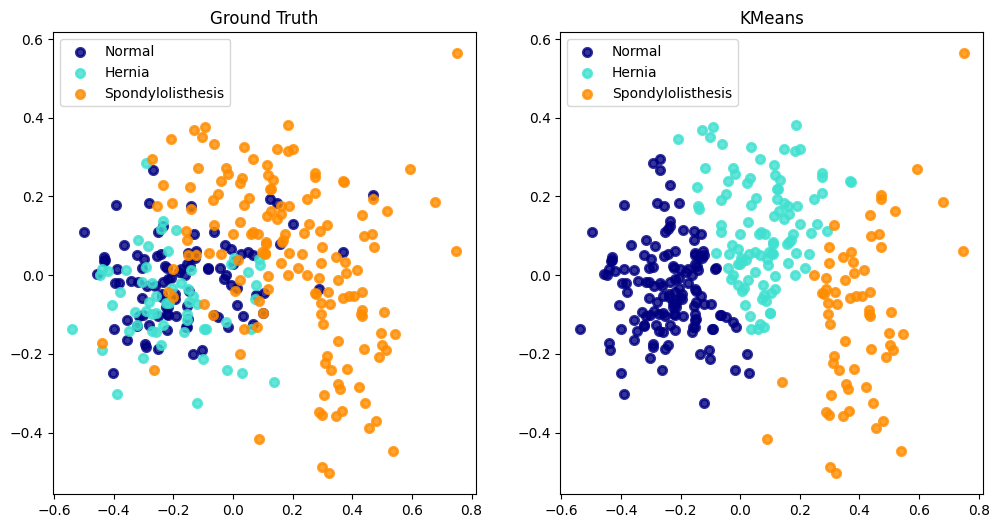

In [25]:
plt.figure(figsize=(12, 6))
target_labels = ['Normal', 'Hernia', 'Spondylolisthesis']
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

# Plot Ground Truth
plt.subplot(1, 2, 1)
for color, i, target_label in zip(colors, [0, 1, 2], target_labels):
    plt.scatter(X_pca[y_true == target_label, 0], X_pca[y_true == target_label, 1], \
        color=color, alpha=.8, lw=lw, label=target_label)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Ground Truth')

# Plot KMeans
plt.subplot(1, 2, 2)
for color, i, target_label in zip(colors, [0, 1, 2], target_labels):
    #  predictions[1] is k=3
    plt.scatter(X_pca[predictions[1] == i, 0], X_pca[predictions[1] == i, 1], \
        color=color, alpha=.8, lw=lw, label=target_label)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('K-Means')

plt.show()

### 4) [1v]

**Considering the results from questions (1) and (3), identify two ways on how clustering can be used to characterize the population of ill and healthy individuals.**

- In the case of question 1, when we try applying k-means for different values of k, we can see that the silhouette and purity of the produced solutions vary, so we can use clustering by finding some value k that maximizes the silhouette and/or the purity, and characterize the population based on those clusters. The obtained results in the exercise are not very good, which means that the observations are not very well classified.

- In the case of question 3, we can compare the clustering with the ground truth by visualizing them. In this case, the observations are not very well classified, since the clusters are not very much accordant with the ground truth. Based on the obtained projections, we can use clustering to characterize an individual with the condition of Spondylolisthesis, because this cluster is in agreement with the ground truth. However, we cannot use clustering to characterize an individual with Normal or Hernia conditions, because those clusters do not correspond to the ground truth.